<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Rena, this is Dmitrii. Happy to review your project again! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


Dmitrii, hello again! Great to have you as my reviewer once more. :) Thank you for going over my work carefully as always and helping me learn with your kind comments and suggestions. 

I ended up adding a lot, but would appreciate it if you could go over my corrections and comments.

Thank you!

Rena

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Once again you achieved a very high level of the project!
    
I left some small remarks in the project to be fixed:
    
- Check data rounding (calls). It should be before aggregation.
- Add histograms to the analysis
- Check Levene's test results.
    
I will wait for the new version of the project. Come back soon! :)
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.

</div>

Dear Reviewer, 
<br>Nice to e-meet you. Thank you for reviewing my work. 
<br>I have some questions and marked them with "[QUESTION]".
<br>I would appreciate it if you could answer them as well.
<br>Thank you!
<br>Rena Bracha

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
- Hi Rena, thank you for submitting your project with all corrections! It has been definely improved and I can see a very good progress.
- Wish you cool projects in the next sprints! ☘️

</div>

# Research on telecom operation

Megaline is a telecommunications service provider, offering its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

Given: data on 500 Megaline clients (user_id: 1000 - 1499)
<br>o who the clients are
<br>o where they are from
<br>o which plan they use
<br>the number of calls they made and text messages they sent in 2018

**Project outline**
* Carry out a preliminary analysis of the calling plans based on a relatively small client selection, 500. 
* Analyze clients' behaviour and determine which prepaid plan brings in more revenue.
* Test some hypotheses concerning the equality of the mean revenues of two samples.
* Conclusion

**Description of the plans**
<br>ATTENTION: At Megaline, 
* Calls: seconds are rounded up to the nearest minutes, i.e. even 1 sec is counted as 1 min. 
* Web traffic: individual web sessions are added up to a monthly total, which is then rounded up. MB are rounded up to the nearest GB, i.e. 1025 MB (1.025 GB) is counted as 2 GB.

[Surf]
1. Monthly charge: 20 USD
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:
* 1 minute: 3 cents
* 1 text message: 3 cents
* 1 GB of data: 10 USD

[Ultimate]
1. Monthly charge: 70 USD
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
* 1 minute: 1 cent
* 1 text message: 1 cent
* 1 GB of data: 7 USD

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
- Very structured project outline and data description.
</div>

<div class="alert alert-info"> <b>Student comments:</b> I learned from the good example you sent me. :) </div> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
Oh, thanks! 😊
</div>

## Open the data file and study the general information. 

### Load the files.

Load various libraries. 

In [1]:
# Import sys so no warnings will be issued. 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# Import various libraries.
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Load the data csv files.

In [2]:
# I worked locally and will have to upload the project to the Platform. So cover both paths. 
# It is a csv file, so the separator is a comma. 
try:
    data_calls = pd.read_csv('megaline_calls.csv', sep = ',')
    data_internet = pd.read_csv('megaline_internet.csv', sep = ',')
    data_messages = pd.read_csv('megaline_messages.csv', sep = ',')
    data_plans = pd.read_csv('megaline_plans.csv', sep = ',')
    data_users1 = pd.read_csv('megaline_users1.csv', sep = ',')
    
except:
    data_calls = pd.read_csv('/datasets/megaline_calls.csv', sep = ',')
    data_internet = pd.read_csv('/datasets/megaline_internet.csv', sep = ',')
    data_messages = pd.read_csv('/datasets/megaline_messages.csv', sep = ',')
    data_plans = pd.read_csv('/datasets/megaline_plans.csv', sep = ',')
    data_users1 = pd.read_csv('/datasets/megaline_users1.csv', sep = ',')    

### Explore the data and make some preliminary observations.

**calls table (data on calls)**

In [3]:
# View some rows to see what the data looks like.
#data_calls.head()
data_calls.sample(10)

,id,user_id,call_date,duration
128413,1460_574,1460,2018-08-19,3.17
84820,1312_312,1312,2018-03-28,1.86
21371,1079_84,1079,2018-09-02,6.61
79109,1283_65,1283,2018-12-26,15.27
68188,1246_207,1246,2018-07-24,0.19
114719,1401_583,1401,2018-11-30,2.65
103115,1365_311,1365,2018-09-28,3.48
16211,1064_69,1064,2018-07-27,14.04
77081,1277_157,1277,2018-07-07,10.29
111632,1392_42,1392,2018-10-07,8.25


In [4]:
# View general information.
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
# View description statistics.
data_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [6]:
# Look at the unique values.
#data_calls['id'].unique()
#data_calls['user_id'].unique()

**internet table (data on web sessions)**

In [7]:
# View some rows to see what the data looks like.
data_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [8]:
# View general information.
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [9]:
# View description statistics.
data_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [10]:
# Look at the unique values.
#data_internet['id'].unique()
#data_internet['user_id'].unique()

**messages table (data on texts)**

In [11]:
# View some rows to see what the data looks like.
data_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [12]:
# View general information.
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
# View description statistics.
data_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [14]:
# Look at the unique values.
#data_messages['id'].unique()
#data_messages['user_id'].unique()

**plans table (data on the plans)**

In [15]:
# View some rows to see what the data looks like.
data_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [16]:
# View general information.
data_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [17]:
# View description statistics.
data_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


**users table (data on users)**

In [18]:
# View some rows to see what the data looks like.
data_users1.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [19]:
# View general information.
data_users1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [20]:
# View description statistics.
data_users1.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [21]:
# Check the unique values.
#data_users1.groupby(['last_name', 'first_name']).count()

In [22]:
# Check the unique values.
#data_users1['age'].value_counts().sort_index()

In [23]:
# Check the unique values.
#sorted(data_users1['city'].unique())

In [24]:
# Check the unique values.
#data_users1['tariff'].unique()

### Conclusion

NOTE: 
* id - do not change the data type, otherwise the '-' will be lost
* 1 GB = 1024 MB

**calls table (data on calls)**
<br>Total rows: 137735
<br>Total columns: 4
* id — unique call identifier
* user_id — the identifier of the user making the call
* call_date — call date
<br>o object -> date_time
* duration — call duration (in minutes)
<br>o round up to the nearest minutes
<br>o 0 min - hung up as soon as the line was connected?

**internet table (data on web sessions)**
<br>Total rows: 104825 
<br>Total columns: 4
* id — unique session identifier
* user_id — user identifier
* session_date — web session date
<br>o object -> date_time]
* mb_used — the volume of data spent during the session (in MB)
<br>o 0 MB - hung up as soon as the user was connected to the internet?
<br>o eventually round up to the nearest GB

**messages table (data on texts)**
<br>Total rows: 76051 
<br>Total columns: 3
* id — unique text message identifier
* user_id — the identifier of the user sending the text
* message_date — text message date
<br>o object -> date_time

**plans table (data on the plans)**
<br>Total rows: 2
<br>Total columns: 8
* messages_included — monthly text allowance
* mb_per_month_included — data volume allowance in MB
* minutes_included — monthly minute allowance
* usd_monthly_fee — monthly charge in USD
* usd_per_gb - price per extra gigabyte of data after exceeding the package limits in USD
* usd_per_message - charge per message in USD
* usd_per_minute — price per minute after exceeding the package limits (e.g. if the package includes 100 minutes, the 101st minute will be charged)
* plan_name — calling plan name

**users table (data on users)**
<br>Total rows: 500
<br>Total columns: 8
* user_id — unique user identifier
* first_name — user's name
* last_name — user's last name
* age — user's age (years)
* city — user's city of residence
* reg_date — subscription date (dd, mm, yy)
<br>o object -> date_time
* tariff - plan name
* churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was generated)
<br>o missing values -> determine how to handle them

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great data overview and plan for the next project section. 

As an extra mile you can try to automate data exploration using function and list of tables as input. 
</div>

<div class="alert alert-info"> <b>Student comments:</b> I will look at as many good examples as possible, learn from them and try to develop my own style. :) </div> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
You can read about functions here: 
    
    https://www.datacamp.com/community/tutorials/functions-python-tutorial
        
Overall in this course, it is not required, but it can be helpful on the real project and if not practise now then when.
</div>

## Prepare the data

### Data preprocessing

* missing values
* variable rename - not required
* unify inconsistent naming - not required
* data type conversion
* illogical values
* bug report
* duplicates
* align with Megaline prepaid plan policy

**Missing values**

Determine how to fill missing values in such a way that the general characteristics of the dataset are maintained, and fill them.
<br>Reason: the presence of NaN values affects the processing and analysis of data - it does not allow for data type conversion to be performed, and it being a float type affects the result of mathematical operations performed on variables containing NaN.

In [25]:
# Check the datasets for missing values.
#data_calls.isnull().sum()
#data_internet.isnull().sum()
#data_messages.isnull().sum()
#data_plans.isnull().sum()
data_users1.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
tariff          0
churn_date    466
dtype: int64

[A note in the project description] churn_date — the date the user stopped using the service (if the value is
missing, the calling plan was being used when this data was generated)


[Observation] 
* 'churn_date' is the only variable that contains missing values. 
* Only 34 (= 500 - 466) rows have NaN in them, meaning those users have left Megaline. 
* According to the note in the project description, NaN has a meaning in the variable, so this is a case of MNAR.
* To enable calculations to be performed on the variable, I will be filling the missing values with toda's date, meaning the calling plan is still active today.

In [26]:
# To make my life easier, convert the data type of 'churn_date' from object to datetime at this stage.
data_users1['churn_date'] = pd.to_datetime(data_users1['churn_date'], format='%Y-%m-%d', errors='coerce')

# Verify it worked. 
#data_users1.info()

In [27]:
# Check the descriptive statistics on 'churn_date'.
data_users1['churn_date'].describe()

count                      34
unique                     29
top       2018-12-18 00:00:00
freq                        3
first     2018-07-31 00:00:00
last      2018-12-31 00:00:00
Name: churn_date, dtype: object

[Observation] The data are from 2018 only, so it is safe to use today's date from the year 2021 to fill the missing values. 

In [28]:
# Fill the missing value with today's date, and save in a new column. 
today = pd.to_datetime('today').normalize()
data_users1['churn_date_filled'] = data_users1['churn_date'].fillna(today)

# Verify it worked.
#data_users1[data_users1['churn_date'].isnull()]
#data_users1[data_users1['churn_date'].notnull()]

**Data type conversion**

Convert the data type from object to datetime in %Y-%m-%d format.
<br>Reason: so we can perform date calculations if necessary.

In [29]:
# calls_table
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

# internet_table
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

# messages_table
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

# users_table
data_users1['reg_date'] = pd.to_datetime(data_users1['reg_date'], format='%Y-%m-%d')

# Verify it worked.
#data_calls.info()
#data_internet.info()
#data_messages.info()
#data_users1.info()

**Illogical values**

Investigate seemingly illogical variables.
<br>Reason: to secure data integrity and obtain statistically meaningful insights based on sound data.

In [30]:
# Some rows in 'calls table' > 'duration' contain 0.
#data_calls[data_calls['duration'] == 0]

# Find out the proportion of zero duration calls in the total number of calls. 
data_calls.query('duration == 0').shape[0]/data_calls.shape[0]

0.1948233927469416

In [31]:
# Some rows in 'internet table' > 'mb_used' contain 0.
#data_internet[data_internet['mb_used'] == 0]

# Find out the proportion of zero duration connections in the total number of connections. 
data_internet.query('mb_used == 0').shape[0]/data_internet.shape[0]

0.1311423801574052

[Observation] 
* 'duration' in 'calls table': approx. 20% of the recorded calls are zero in duration, which is rather high. 
* 'mb_used' in 'internet table': approx. 13% of the recorded connections are zero in duration.

When a system attempts a call but fails to connect, that call is usually logged as a call with zero duration. These failures may be due to a number of causes: an incorrectly dialed number, the called user was busy, the called user did not answer. So, I would like to deem these rows to be legitimate records. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Well done. You identified strange zero values in data.
</div>

**Bug report**

Investigate seemingly illogical variables and reate a bug report as necessary.
<br>Reason: report to the data engineer/data owner indications of possible faults in the data production/collection system.

In [32]:
# Check if there are illegal 'churn_date' values which come before 'reg_date' values.
data_users1.query('churn_date < reg_date')

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,churn_date_filled


In [33]:
# Create a dataset which contain 'churn_date' and 'call_date'.
churn_vs_call = data_users1[['user_id', 'churn_date']]
data_calls_copy = data_calls
calls_with_churn = pd.merge(left = data_calls_copy, right = churn_vs_call, how = 'outer', on='user_id')

# View the dataset.
#calls_with_churn.head()

# Check if there are illegal 'churn_date' values which come before 'call_date' values.
less_churn1 = calls_with_churn.query('call_date > churn_date')

# View the dataset. 
less_churn1

,id,user_id,call_date,duration,churn_date
973,1006_50,1006,2018-12-21,12.30,2018-12-18
976,1006_74,1006,2018-12-26,9.12,2018-12-18
3561,1012_1,1012,2018-12-19,0.00,2018-11-16
3562,1012_2,1012,2018-12-23,2.53,2018-11-16
3563,1012_3,1012,2018-12-07,0.00,2018-11-16
...,...,...,...,...,...
135668,1491_639,1491,2018-11-26,4.87,2018-09-18
135670,1491_641,1491,2018-12-14,10.39,2018-09-18
135671,1491_642,1491,2018-10-08,6.91,2018-09-18
135672,1491_644,1491,2018-11-29,11.17,2018-09-18


In [34]:
# Check the proportion of the rows with the issue. 
print(round(less_churn1.count()/len(data_calls),3))

id            0.021
user_id       0.021
call_date     0.021
duration      0.021
churn_date    0.021
dtype: float64


In [35]:
# Create a dataset which contain 'churn_date' and 'session_date'.
data_internet_copy = data_internet
internet_with_churn = pd.merge(left = data_internet_copy, right = churn_vs_call, how = 'outer', on='user_id')

# View the dataset.
#internet_with_churn.head()

# Check if there are rows where 'session_date' > 'churn_date'.
less_churn2 = internet_with_churn.query('session_date > churn_date')

# View the dataset.
less_churn2

,id,user_id,session_date,mb_used,churn_date
948,1006_14,1006,2018-12-24,342.75,2018-12-18
954,1006_25,1006,2018-12-22,349.08,2018-12-18
955,1006_26,1006,2018-12-25,309.67,2018-12-18
956,1006_31,1006,2018-12-24,557.89,2018-12-18
957,1006_49,1006,2018-12-25,95.65,2018-12-18
...,...,...,...,...,...
102752,1491_247,1491,2018-10-30,341.79,2018-09-18
102753,1491_249,1491,2018-11-28,124.95,2018-09-18
102755,1491_251,1491,2018-12-24,428.70,2018-09-18
102761,1491_262,1491,2018-11-11,288.54,2018-09-18


In [36]:
# Check the proportion of the rows with the issue. 
print(round(less_churn2.count()/len(data_internet),3))

id              0.023
user_id         0.023
session_date    0.023
mb_used         0.023
churn_date      0.023
dtype: float64


[Observation] There are customers who still continue to leverage the prepaid plans for calls and internet connection even after they have left Megaline! 

[Bug Report]
The issue is in about 2% of the data on calls and on internet, and concerns the integrity and validity of the data. 
* Does the system fail to verify customer access whether or not they have a valid call package use?
* Do these customers have a special concession that they are allowed to continue using the call package deal beyond the package validity date?

Since it will not make any sense to replace with the median, and it will lead to meaningless data loss if I were to delete those rows, I would like to choose reporting the issue as a potential bug to the data engineer/data owner as the only possible cause of action. 

I would describe the two cases: (1) 'call_date > churn_date', and (2) 'session_date > churn_date', and the nature of the problem and its consequences to the business, and attach the two .csv files, highlighting the problematic rows in yellow in MSExcel. (If I were handling big data beyond MSExcel's processing capability, I would send only the problematic rows in a copy of the two csv files, extracted by using an SQL query).

[Data validity with regard to the project]
I will not have to perform calculations on 'churn_date' in this project, however, the validity of the data in the two csv files is now in question. The presence of these rows in the data is illegal. However, they still provide valuable information towards the goal of the project, so I will not be removing those rows. 

[QUESTION] Please advise what should be done in a real scenario when waiting for a response from the data engineer/data owner to return corrected files is not an option. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
That is very interesting observation! Good, that you managed to identify it in the data. In this case let's assume that we have an issue in the data storing process. And there is a delay between the date when user actually used a service and what we see in the data.
    
On a real project that is definetely smth that you need to discuss with data engineer/software developer to understand why this is happening. At the same time continue with your analysis where possible.
</div>

<div class="alert alert-info"> <b>Student comments:</b> An interesting cause for the issue. Undertood. 👍🏻 </div> 

**Duplicates**

In [37]:
# Look for duplicate rows where they are identical column for column. 
#data_calls.duplicated().sum()
#data_internet.duplicated().sum()
#data_messages.duplicated().sum()
#data_plans.duplicated().sum()
#data_users1.duplicated().sum()

[Observation] There are no such rows. 

**Aligning with Megaline prepaid plan policy**

In [38]:
# Add the data volume included in the free package plans in GB to reflect the Megaline policy.
data_plans['gb_per_month_included'] = np.where(data_plans['plan_name'] == 'surf', 15, 30)

# Verify it worked. 
#data_plans

### Conclusion

In order to prepare the data for analyses and hypothesis testing, the following issues were checked and handled as necessary:
* missing values: 'churn_date' was found to be MNAR, and the missing values were filled with today's date to enable calculations on the variable, and yet, were kept distinguishable from the non-empty values, which had been there originally. 
* data type conversion: 'call_date', 'session_date', 'message_date' and 'reg_date' date variables were converted to datetime data type to enable caculations on them. 
* illogical values: 'duration' in the call data and 'mb_used were found to contain 0, were investigated and were found to be legitimate. 
* bug report: some 'churn_date' values were found to preceded 'call_date' and 'session_date', indicating some customers were allowed to make calls and connect to the Internet after they had already cancelled the calling packages. The issue was reported to be handled by the data engineer/data owner. 
* align with Megaline prepaid plan policy: Megaline charges to the nearest minutes rather than seconds, and to the nearest GB rather than MB. The plans data were updated to accurately reflect the charging policy to enable correct methods of calculations. 

The data were checked in the following aspects and no issues were found:
* variable rename
* unify inconsistent naming
* duplicates

## Calculations

For each user, find the following:

* The number of calls made and minutes used per month
* The number of text messages sent per month
* The volume of data per month
* The monthly revenue from each user (subtract the free package limit from the total call duration, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

[Comment] In the project description, it was written, "(subtract the free package limit from the total number of calls...". Since Megaline prepaid plans are defined based on call duration rather than number of calls, I took the liberty of re-interpreting the sentence the way I did. 

**For each user, find the number of calls made and minutes used per month.**

In [39]:
# Find the period the dataset covers.
call_period_min = data_calls['call_date'].min()
call_period_max = data_calls['call_date'].max()

#print(call_period_min, '-', call_period_max)

# The data are from 2018 only. So only extract the month from 'call_date' and store in a new column.
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month

# Verify that it worked.  
#data_calls.head()

In [40]:
# Round up the seconds to the nearest minutes in 'duration'. 
# Reason: each individual call in minutes and seconds is rounded up to the nearest minutes. 
data_calls['duration_min'] = np.ceil(data_calls['duration']).astype(int)

# Verify it worked
#data_calls.head()

In [41]:
# Group the data by 'user_id' and 'month', and find the total number of calls made in each month. 
call_total = data_calls.groupby(['user_id', 'month'])['id'].count().to_frame().reset_index()

# View the result. 
call_total.head()

,user_id,month,id
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [42]:
# Group the data by 'user_id' and 'month', and find the total call duration in minutes for each month. 
duration_total_mins = data_calls.groupby(['user_id', 'month'])['duration_min'].sum().to_frame().reset_index()

# View the result.  
duration_total_mins.head()

,user_id,month,duration_min
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


<div class="alert alert-info"> <b>Student comments:</b> I rounded up the call duration to the nearest minutes here. </div> 

**For each user, find the number of text messages sent per month.**

In [43]:
# Find the period the dataset covers.
message_period_min = data_messages['message_date'].min()
message_period_max = data_messages['message_date'].max()

#print(message_period_min, '-', message_period_max)

# The data are from 2018 only. So only extract the month from 'message_date' and store in a new column.
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month

# Verify that it worked.  
#data_messages.head()

In [44]:
# Group the data by 'user_id' and 'month', and find the total number of messages sent per month. 
message_total = data_messages.groupby(['user_id', 'month'])['id'].count().to_frame().reset_index()

# View the result. 
message_total.head()

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


**For each user, find the volume of data per month.**

In [45]:
# Find the period the dataset covers.
internet_period_min = data_internet['session_date'].min()
internet_period_max = data_internet['session_date'].max()

#print(internet_period_min, '-', internet_period_max)

# The data are from 2018 only. So only extract the month from 'session_date' and store in a new column.
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month

# Verify that it worked.  
#data_internet.head()

In [46]:
# Round up to the MB to the nearest GB in 'mb_used'.
# Reason: the total for the month is rounded up to the nearest GB.
data_internet['gb_used'] = np.ceil(data_internet['mb_used'] / 1024).astype(int)

# Verify it worked
#data_internet.head()

<div class="alert alert-info"> <b>Student comments:</b> I rounded up the data volume consumption to the nearest GB here. </div> 

In [47]:
# Group the data by 'user_id' and 'month', and find the total volume of data consumed per month. 
data_volume_total = data_internet.groupby(['user_id', 'month'])['gb_used'].sum().to_frame().reset_index()

# View the result. 
data_volume_total.head()

,user_id,month,gb_used
0,1000,12,4
1,1001,8,21
2,1001,9,41
3,1001,10,50
4,1001,11,49


**For each user, find the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)**

In [48]:
# Merge all the totals (number of calls, duration, number of messages, data volume) into a single dataframe.
data_frames = [call_total, duration_total_mins, message_total, data_volume_total]
total3 = reduce(lambda left, right: pd.merge(left, right, on=['user_id', 'month'], how='outer'), data_frames)

# Verify it worked.
#total3

# Rename the column headers for readability. 
total3.rename(columns={'id_x':'calls', 'id_y':'messages'}, inplace=True)

# Verify it worked. 
total3.head()

,user_id,month,calls,duration_min,messages,gb_used
0,1000,12,16.0,124.0,11.0,4.0
1,1001,8,27.0,182.0,30.0,21.0
2,1001,9,49.0,315.0,44.0,41.0
3,1001,10,65.0,393.0,53.0,50.0
4,1001,11,64.0,426.0,36.0,49.0


<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
Great. how = 'outer' works fine here (default method for concat) in order to keep all data even when a user is inactive.
    
By the way, it is possible to group 3 tables at the same time using reduce function. You can read about it here:
https://www.codegrepper.com/code-examples/python/merge+more+than+2+dataframes+in+pandas

</div>

<div class="alert alert-info"> <b>Student comments:</b> A great code optimisation and enhanced readability! Thank you. </div> 

In [49]:
# For each user, look up and add 'tariff' to the table above. 
# Add 'first_name', 'last_name' and 'city' also for posterity. 
user_vs_tariff = data_users1[['user_id', 'first_name', 'last_name', 'city', 'tariff']]
total4 = pd.merge(left = total3, right = user_vs_tariff, how = 'outer', on='user_id')

# Verify it worked. 
#total4.head()

In [50]:
# For each user, get all the information for the relevant prepaid plan. 
data_plans.rename(columns={'plan_name':'tariff'}, inplace=True)
total5 = pd.merge(left = total4, right = data_plans, how = 'outer', on='tariff')

# Verify it worked. 
#total5.head()

In [51]:
# Check the datasize of the datasets. 
print(call_total.shape[0], duration_total_mins.shape[0], message_total.shape[0], data_volume_total.shape[0])

# Check for NaN.
#total5[total5.isnull()]

2258 2258 1806 2277


[Observation] Because the datasets created have different number of rows, there are bound to be NaN values in the merged table 'total5'. 

Let's clean up. 

In [52]:
# Remove rows where 'month', 'calls', 'duration', 'messages', 'mb_used', all contain NaN since they do not offer any information to our studies. 
# Then fill the rest of NaN values with zero.
total5 = total5.dropna(subset=['month', 'calls', 'duration_min', 'messages', 'gb_used'], how='all').fillna(0)

# Verify it worked.
#total5.tail()

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Ok, great job! Good that you did not forget about data rounding, but based on the project description calls should be rounded even before aggregation, so here we need to use data_calls table.
</div>

<div class="alert alert-info"> <b>Student comments:</b> I did data rounding for the call duration and data volume consumption before aggregation this time. Please see above. </div> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
Great! Now data rounding is correct.
</div>

In [53]:
# Subtract the free package limit from the total number of calls, text messages, and data.
# Limit a negative value by zero, then multiply the result by the calling plan value.
total5['duration_surcharge'] = (total5['duration_min'] - total5['minutes_included']).clip(0) * total5['usd_per_minute']
total5['message_surcharge'] = (total5['messages'] - total5['messages_included']).clip(0) * total5['usd_per_message']
total5['gb_surcharge'] = (total5['gb_used'] - total5['gb_per_month_included']).clip(0) * total5['usd_per_gb']

# Add the monthly charge depending on the calling plan.                                  
total5['monthly_revenue_total'] = total5['duration_surcharge'] + total5['message_surcharge'] + total5['gb_surcharge'] + total5['usd_monthly_pay']

# Verify it worked
#total5.tail()

CPU times: user 11.2 ms, sys: 0 ns, total: 11.2 ms
Wall time: 9.15 ms


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
I would recommend sticking to the one naming convention for columns, variables, etc. The most typical approach is to use snake case first_name. You can read about it here - https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86 The key thing it should be consistent across your work and aligned with what is acceptable within your team.
</div>

<div class="alert alert-info"> <b>Student comments:</b> I changed all the uppercase variable names to lowercase ones. I will follow the community conventions. </div> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
Thanks for aligning that!
</div>

[Conclusion] Below is the table showing the monthly revenue total from each user.

In [1]:
total5['month'] = total5['month'].astype(int)
user_vs_monthly_revenue = total5[['user_id', 'first_name', 'last_name', 'month', 'monthly_revenue_total']]

#Verify it worked. 
user_vs_monthly_revenue

NameError: name 'total5' is not defined

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
Very nice solution!
    
I will definitely recommend your solution for calculating revenue using clip() method to other students :)

Another way to do it using np.where method - https://numpy.org/doc/stable /reference/generated/numpy.where.html

    np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')   

It works similarly but has more flexibility.
</div>

<div class="alert alert-info"> <b>Student comments:</b> Thank you for the compliment! I thought that it would be cheaper computation-wise to have the right values ready in the right places and mechanically multiply, rather than comparing on the basis of a condition each time. :)</div> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>

Exactly! For loops, apply(), if/else consumes much more computation time than numpy methods.
    
Btw you can compare computation time of different methods / code by adding `%%time` in the first line of the cell. It will show overall execution time. Like this: 
    
       %%time 
       total5['month'] = total5['month'].astype(int)
    
</div>

## Analyze the data

Describe the customers' behavior. Find the minutes, texts, and volume of data
the users of each plan require per month. Calculate the mean, variance, and
standard deviation. Plot histograms. Describe the distributions.

**Find the minutes the users of each plan require per month.**

In [55]:
# Calculate the total duration of all the calls made by all the users in each calling plan during each month.
total_duration_per_tariff = total5.pivot_table(index = 'month', columns = 'tariff', values = 'duration_min', aggfunc = 'sum')

# View the pivot table. 
total_duration_per_tariff

tariff,surf,ultimate
month,,
1,406.0,774.0
2,2673.0,2822.0
3,7590.0,3651.0
4,17577.0,7074.0
5,30768.0,11781.0
6,41836.0,17435.0
7,54448.0,25197.0
8,66438.0,29922.0
9,80360.0,37626.0


[Observation] Surf's total call duration overtook Ultimate's after a few months, and from then on, stayed 2.5 times higher. This may be due to there being twice as many customers purchasing Surf than Ultimate, or Surf customers being more chatty than Ultimate customers. 

**Find the texts the users of each plan require per month.**

In [56]:
# Calculate the total number of messages sent by all the users in each calling plan during each month.
total_messages_per_tariff = total5.pivot_table(index = 'month', columns = 'tariff', values = 'messages', aggfunc = 'sum')

# View the pivot table. 
total_messages_per_tariff.astype(int)

tariff,surf,ultimate
month,,
1,21,62
2,108,151
3,351,243
4,870,463
5,1849,931
6,2454,1379
7,3271,1937
8,4662,2732
9,5968,3259


[Observation] It stands to reason that Surf customers sent double the number of text messages, compared to Ultimate customers, since they are double the size of Ultimate customer goup. 

**Find the volume of data the users of each plan require per month.**

In [57]:
# Calculate the total volume of data consumed by all the users in each calling plan during each month.
total_GB_per_tariff = total5.pivot_table(index = 'month', columns = 'tariff', values = 'gb_used', aggfunc = 'sum')

# View the pivot table. 
total_GB_per_tariff

tariff,surf,ultimate
month,,
1,28.0,61.0
2,270.0,278.0
3,719.0,483.0
4,1444.0,807.0
5,2606.0,1140.0
6,3639.0,1685.0
7,4872.0,2339.0
8,6525.0,3026.0
9,7803.0,3480.0


[Observation] There are twice as many Surf customers compared to Ultimate customers, and that is reflected in the twice as much volume of data consumed. 

**Calculate the mean, variance, and standard deviation for the data on minutes.**

[Note] I would like to relate to standard deviation rather than to variance, since it has the same units as the mean, making it easier to compare in conjunction with the mean, unlike variance which has unit squared.

In [58]:
# Calculate the measures of location for the total duration of all the calls made by all the users in each calling plan during each month.
stats_duration_per_tariff = total5.pivot_table(index = 'month', columns = 'tariff', values = 'duration_min', aggfunc = ['mean', 'var', 'std'])

# Add the normalised standard deviation. 
new_cols = pd.MultiIndex.from_product([['std_norm'], ['ultimate', 'surf']])
stats_duration_per_tariff[new_cols] = stats_duration_per_tariff['std']/stats_duration_per_tariff['mean']

# View the pivot table.
stats_duration_per_tariff

mean                       var                       std  \
tariff        surf    ultimate          surf      ultimate        surf   
month                                                                    
1       203.000000  193.500000  15842.000000  16572.333333  125.865007   
2       297.000000  403.142857  52226.500000  76889.476190  228.531179   
3       330.000000  304.250000  35809.363636  61984.931818  189.233622   
4       351.540000  336.857143  50866.743265  34888.928571  225.536567   
5       399.584416  406.241379  59754.219754  43841.046798  244.446763   
6       431.298969  370.957447  45592.628436  42503.563367  213.524304   
7       449.983471  427.067797  61005.099725  72563.374635  246.992105   
8       410.111111  421.436620  54344.645963  53645.506640  233.119381   
9       414.226804  437.511628  46595.958656  57070.464569  215.860971   
10      429.729958  450.735849  52278.664056  54261.910512  228.645280   
11      423.325088  445.196850  51607.021602  60593.222847  227.171789   
12      473.836478  459.099338  63629.518918  62503.783400  252.248923   

                    std_norm            
tariff    ultimate  ultimate      surf  
month                                   
1       128.733575  0.620025  0.665290  
2       277.289517  0.769465  0.687819  
3       248.967732  0.573435  0.818300  
4       186.785783  0.641567  0.554496  
5       209.382537  0.611752  0.515414  
6       206.163924  0.495073  0.555762  
7       269.375898  0.548892  0.630757  
8       231.614997  0.568430  0.549584  
9       238.894254  0.521118  0.546029  
10      232.941861  0.532067  0.516803  
11      246.156907  0.536637  0.552917  
12      250.007567  0.532354  0.544561

**Calculate the mean, variance, and standard deviation for the data on texts.**

[Note] I would like to relate to standard deviation rather than to variance, since it has the same units as the mean, making it easier to compare in conjunction with the mean, unlike variance which has unit squared.

In [59]:
# Calculate the measures of location for the total volume of data consumed by all the users in each calling plan during each month.
stats_messages_per_tariff = total5.pivot_table(index = 'month', columns = 'tariff', values = 'messages', aggfunc = ['mean', 'var', 'std'])

# Add the normalised standard deviation. 
new_cols = pd.MultiIndex.from_product([['std_norm'], ['ultimate', 'surf']])
stats_messages_per_tariff[new_cols] = stats_messages_per_tariff['std']/stats_messages_per_tariff['mean']

# View the pivot table. 
stats_messages_per_tariff

mean                     var                     std             \
tariff       surf   ultimate         surf     ultimate       surf   ultimate   
month                                                                          
1       10.500000  15.500000   220.500000   313.666667  14.849242  17.710637   
2       12.000000  21.571429   386.000000   478.285714  19.646883  21.869744   
3       15.260870  20.250000   346.565217   654.386364  18.616262  25.580977   
4       17.400000  22.047619   501.591837   544.147619  22.396246  23.326972   
5       24.012987  32.103448   847.197198  1297.310345  29.106652  36.018195   
6       25.298969  29.340426   914.920103   857.620722  30.247646  29.285162   
7       27.033058  32.830508   923.915565   960.488019  30.395979  30.991741   
8       28.777778  38.478873  1029.515528  1196.367404  32.086064  34.588544   
9       30.762887  37.895349  1003.829496  1050.918331  31.683268  32.417871   
10      33.839662  39.443396  1275.465708  1221.106289  35.713663  34.944331   
11      32.385159  38.606299  1065.344034  1232.669166  32.639608  35.109389   
12      38.600629  45.006623  1458.158612  1549.419956  38.185843  39.362672   

        std_norm            
tariff  ultimate      surf  
month                       
1       1.414214  1.142622  
2       1.637240  1.013829  
3       1.219869  1.263258  
4       1.287141  1.058027  
5       1.212121  1.121942  
6       1.195608  0.998116  
7       1.124400  0.943992  
8       1.114960  0.898897  
9       1.029919  0.855458  
10      1.055379  0.885936  
11      1.007857  0.909421  
12      0.989254  0.874597

**Calculate the mean, variance, and standard deviation for the data on volume of data.**

[Note] I would like to relate to standard deviation rather than to variance, since it has the same units as the mean, making it easier to compare in conjunction with the mean, unlike variance which has unit squared.

In [60]:
# Calculate the measures of location for the total volume of data consumed by all the users in each calling plan during each month.
stats_GB_per_tariff = total5.pivot_table(index = 'month', columns = 'tariff', values = 'gb_used', aggfunc = ['mean', 'var', 'std'])

# Add the normalised standard deviation. 
new_cols = pd.MultiIndex.from_product([['std_norm'], ['ultimate', 'surf']])
stats_GB_per_tariff[new_cols] = stats_GB_per_tariff['std']/stats_GB_per_tariff['mean']

# View the pivot table. 
stats_GB_per_tariff

mean                    var                    std             \
tariff       surf   ultimate        surf    ultimate       surf   ultimate   
month                                                                        
1       14.000000  15.250000   98.000000   68.916667   9.899495   8.301606   
2       30.000000  39.714286  290.500000  293.238095  17.044061  17.124196   
3       31.260870  40.250000  348.474308  656.022727  18.667467  25.612941   
4       28.880000  38.428571  324.352653  409.957143  18.009793  20.247398   
5       33.844156  39.310345  318.001709  242.793103  17.832602  15.581820   
6       37.515464  35.851064  250.585696  297.781684  15.829899  17.256352   
7       40.264463  39.644068  306.862810  324.474576  17.517500  18.013178   
8       40.277778  42.619718  371.270186  247.239034  19.268373  15.723836   
9       40.221649  40.465116  257.292586  205.334063  16.040342  14.329482   
10      41.987342  41.556604  304.419331  225.830099  17.447617  15.027644   
11      39.957597  40.732283  288.480465  255.022997  16.984713  15.969439   
12      43.949686  44.377483  338.035315  286.063223  18.385737  16.913404   

        std_norm            
tariff  ultimate      surf  
month                       
1       0.707107  0.544368  
2       0.568135  0.431185  
3       0.597151  0.636346  
4       0.623608  0.526884  
5       0.526903  0.396380  
6       0.421957  0.481334  
7       0.435061  0.454373  
8       0.478387  0.368933  
9       0.398799  0.354119  
10      0.415545  0.361619  
11      0.425068  0.392059  
12      0.418336  0.381126

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
Everything is correct here.
</div>

**Plot histograms for the call duration.**

Calculate the average call duration per user in each calling plan, and plot a histogram. 

In [61]:
# Create a data slice of mean call duration per user, one for Surf users and one for Ultimate users. 
mean_duration_surf = total5.query('tariff == "surf"').groupby('user_id')['duration_min'].mean()
mean_duration_ultimate = total5.query('tariff == "ultimate"').groupby('user_id')['duration_min'].mean()

# Find the upper boundary common to both. 
print('Surf Max:', mean_duration_surf.max(), 'Ultimate Max:', mean_duration_ultimate.max())

Surf Max: 1104.0 Ultimate Max: 1054.5714285714287


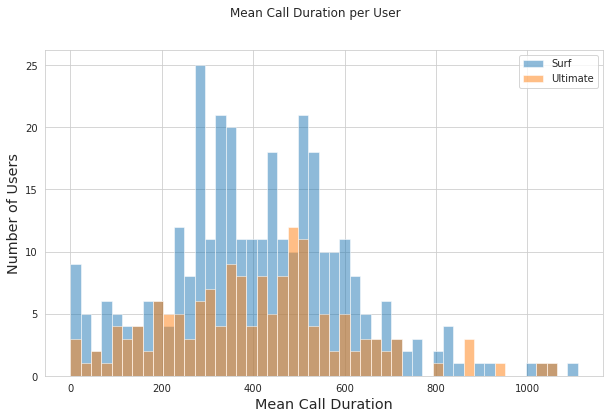

In [62]:
# Plot a histogram and... 
sns.set_style("whitegrid")
plt.figure(figsize=(10,6));
bins = np.linspace(0, 1110)
plt.hist(mean_duration_surf, bins, alpha=0.5, label='Surf')
plt.hist(mean_duration_ultimate, bins, alpha=0.5, label='Ultimate')
plt.legend(loc='upper right')
plt.suptitle("Mean Call Duration per User")
plt.ylabel('Number of Users', size='x-large')
plt.xlabel('Mean Call Duration', size= 'x-large')
plt.show()

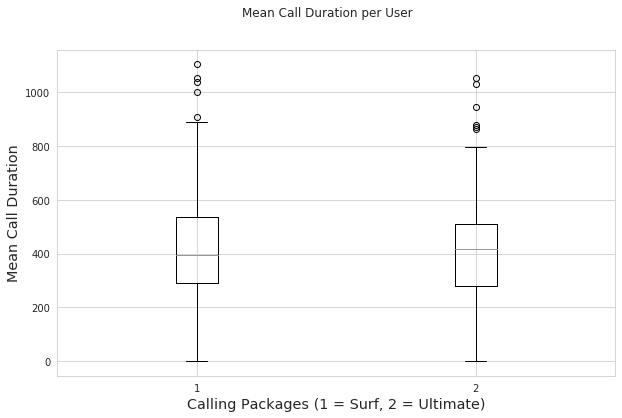

In [63]:
# ...a box-and-whisker chart.
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.suptitle("Mean Call Duration per User")
plt.ylabel('Mean Call Duration', size='x-large')
plt.xlabel('Calling Packages (1 = Surf, 2 = Ultimate)', size= 'x-large')
plt.ticklabel_format(useOffset = False, style = 'plain', axis='y')
plt.boxplot([mean_duration_surf, mean_duration_ultimate])
plt.show()

In [64]:
# Check the min and max of the two boxplots. 
#B1 = mean_duration_surf.plot.box(return_type='dict')
#max1 = B1['whiskers'][1].get_ydata()[1]

#B2 = mean_duration_ultimate.plot.box(return_type='dict')
#max2 = B2['whiskers'][1].get_ydata()[1]

#print('B1:', max1, 'B2:', max2)

Calculate the standard deviation of call durations per user in each calling plan, and plot a histogram. 

In [65]:
# Create a data slice of the standard deviation for call durations, one for Surf users and one for Ultimate users. 
# When grouping 'duration_min' by 'used_id' and there happens to be only one row in a group, the sample standard deviation 
# returns NaN. So replacing NaN values with 0. 
std_duration_surf = total5.query('tariff == "surf"').groupby('user_id')['duration_min'].std().fillna(0)
std_duration_ultimate = total5.query('tariff == "ultimate"').groupby('user_id')['duration_min'].std().fillna(0)

# Find the upper boundary common to both. 
print('Surf Max:', std_duration_surf.max(), 'Ultimate Max:', std_duration_ultimate.max())

Surf Max: 966.6149698820104 Ultimate Max: 597.5052301026327


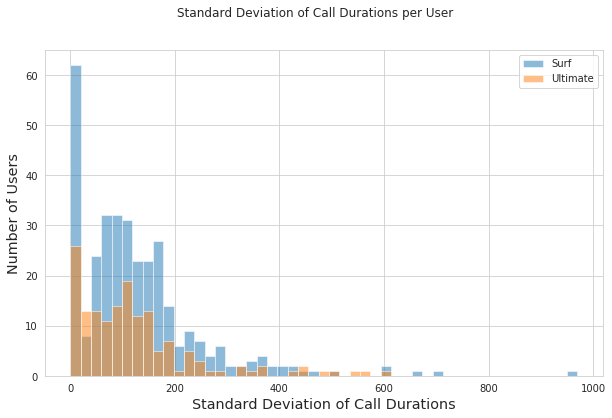

In [66]:
# Plot a histogram and... 
sns.set_style("whitegrid")
plt.figure(figsize=(10,6));
bins = np.linspace(0, 970)
plt.hist(std_duration_surf, bins, alpha=0.5, label='Surf')
plt.hist(std_duration_ultimate, bins, alpha=0.5, label='Ultimate')
plt.legend(loc='upper right')
plt.suptitle("Standard Deviation of Call Durations per User")
plt.ylabel('Number of Users', size='x-large')
plt.xlabel('Standard Deviation of Call Durations', size= 'x-large')
plt.show()

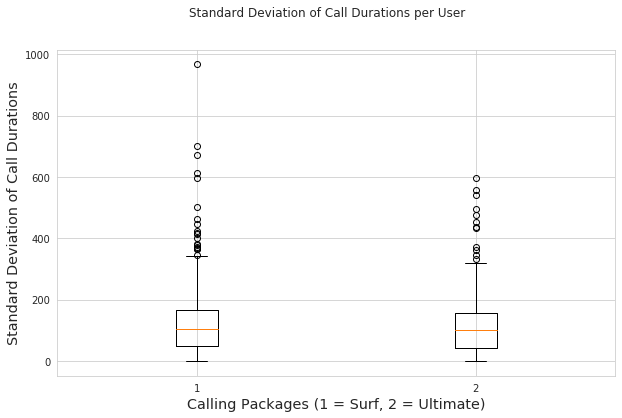

In [67]:
# ...a box-and-whisker chart.
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.suptitle("Standard Deviation of Call Durations per User")
plt.ylabel('Standard Deviation of Call Durations', size='x-large')
plt.xlabel('Calling Packages (1 = Surf, 2 = Ultimate)', size= 'x-large')
plt.ticklabel_format(useOffset = False, style = 'plain', axis='y')
plt.boxplot([std_duration_surf, std_duration_ultimate])
plt.show()

In [68]:
# Check the min and max of the two boxplots. 
#B3 = std_duration_surf.plot.box(return_type='dict')
#max3 = B3['whiskers'][1].get_ydata()[1]

#B4 = std_duration_ultimate.plot.box(return_type='dict')
#max4 = B4['whiskers'][1].get_ydata()[1]

#print('B3:', max3, 'B4:', max4)

Plot a bar chart for the mean duration of all the calls made by all the users in each calling plan during each month.

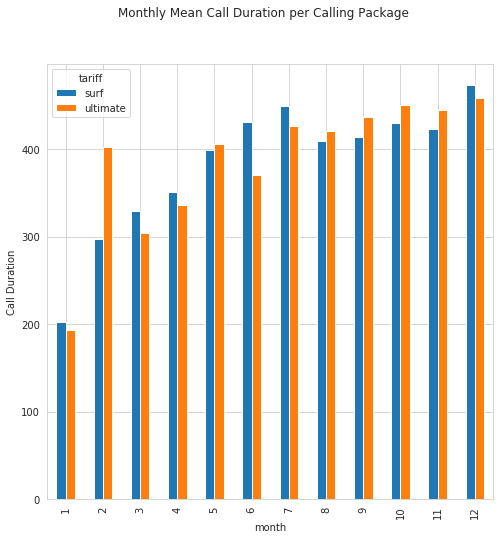

In [69]:
mean_duration = stats_duration_per_tariff['mean']
hist1_length = len(mean_duration)
ax = mean_duration.plot(kind = 'bar', figsize = (8, 8))
ylab = ax.set_ylabel('Call Duration')
plt.xticks(np.arange(hist1_length), np.arange(1, hist1_length + 1));
plt.suptitle("Monthly Mean Call Duration per Calling Package");

In [70]:
# Check which customers brought up the February call duration total.
#total5.query('tariff == "ultimate" and month == 2').sort_values('duration_min', ascending = False)
#total5.query('tariff == "surf" and month == 6').sort_values('duration_min', ascending = False)

<Figure size 720x432 with 0 Axes>

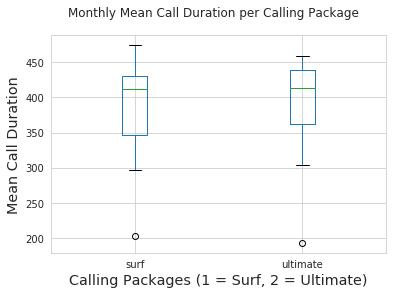

In [71]:
# ...and a boxplot.
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
mean_duration.plot.box();
plt.ticklabel_format(useOffset = False, style = 'plain', axis='y')
plt.suptitle("Monthly Mean Call Duration per Calling Package")
plt.ylabel('Mean Call Duration', size='x-large')
plt.xlabel('Calling Packages (1 = Surf, 2 = Ultimate)', size= 'x-large')
plt.ticklabel_format(useOffset = False, style = 'plain', axis='y')
plt.show()

Plot a bar chart for the normalised standard deviation of all call durations made by all the users in each calling plan during each month.

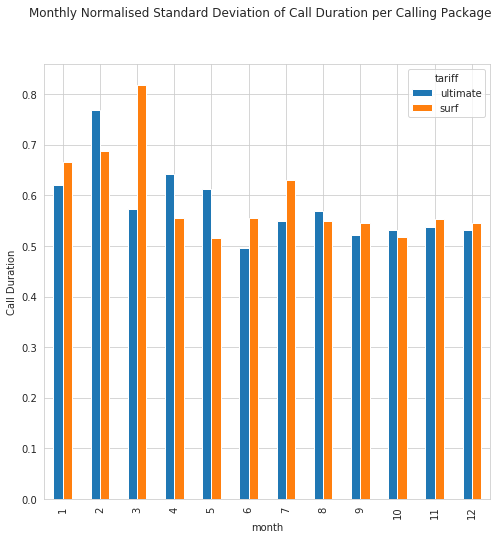

In [72]:
std_norm_duration = stats_duration_per_tariff['std_norm']
hist1_length = len(std_norm_duration)
ax = std_norm_duration.plot(kind = 'bar', figsize = (8, 8))
ylab = ax.set_ylabel('Call Duration')
plt.xticks(np.arange(hist1_length), np.arange(1, hist1_length + 1));
plt.suptitle("Monthly Normalised Standard Deviation of Call Duration per Calling Package");

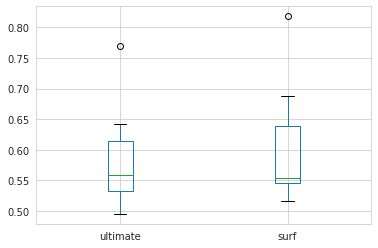

In [73]:
# ...and a boxplot.
std_norm_duration.plot.box();
plt.ticklabel_format(useOffset = False, style = 'plain', axis='y')

**Plot histograms for the data on texts.**

Calculate the average number of text messages sent per user in each calling plan, and plot a histogram.

In [74]:
# Create a data slice for the average number of text messages sent per user, one for Surf users and one for Ultimate users. 
mean_message_volume_surf = total5.query('tariff == "surf"').groupby('user_id')['messages'].mean()
mean_message_volume_ultimate = total5.query('tariff == "ultimate"').groupby('user_id')['messages'].mean()

# Find the upper boundary common to both. 
print('Surf Max:', mean_message_volume_surf.max(), 'Ultimate Max:', mean_message_volume_ultimate.max())

Surf Max: 159.0 Ultimate Max: 148.0


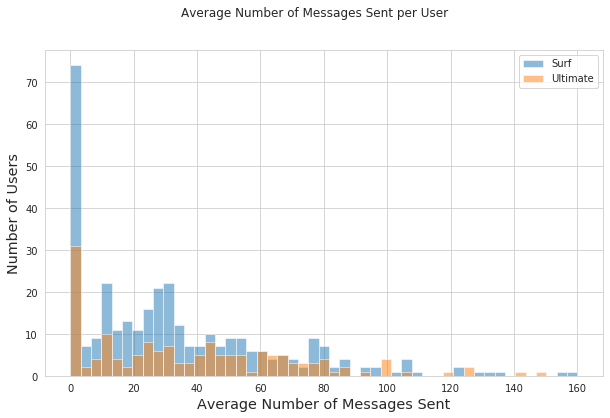

In [75]:
# Plot a histogram and... 
sns.set_style("whitegrid")
plt.figure(figsize=(10,6));
bins = np.linspace(0, 160)
plt.hist(mean_message_volume_surf, bins, alpha=0.5, label='Surf')
plt.hist(mean_message_volume_ultimate, bins, alpha=0.5, label='Ultimate')
plt.legend(loc='upper right')
plt.suptitle("Average Number of Messages Sent per User")
plt.ylabel('Number of Users', size='x-large')
plt.xlabel('Average Number of Messages Sent', size= 'x-large')
plt.show()

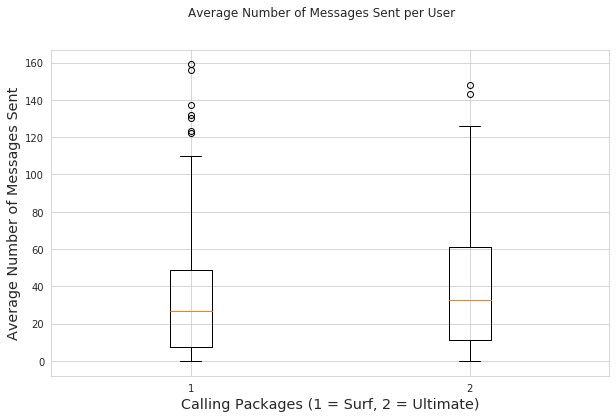

In [76]:
# ...a box-and-whisker chart.
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.suptitle("Average Number of Messages Sent per User")
plt.ylabel('Average Number of Messages Sent', size='x-large')
plt.xlabel('Calling Packages (1 = Surf, 2 = Ultimate)', size= 'x-large')
plt.ticklabel_format(useOffset = False, style = 'plain', axis='y')
plt.boxplot([mean_message_volume_surf, mean_message_volume_ultimate])
plt.show()

In [77]:
# Check the min and max of the two boxplots. 
#B5 = mean_message_volume_surf.plot.box(return_type='dict')
#max5 = B5['whiskers'][1].get_ydata()[1]

#B6 = mean_message_volume_ultimate.plot.box(return_type='dict')
#max6 = B6['whiskers'][1].get_ydata()[1]

#print('B5:', max5, 'B6:', max6)

Calculate the standard deviation of all the messages sent per user in each calling plan, and plot a histogram.

In [78]:
# Create a data slice of the standard deviation for the number of messages sent per user, one for Surf users and one for Ultimate users. 
# When grouping 'messages' by 'used_id' and there happens to be only one row in a group, the sample standard deviation 
# returns NaN. So replacing NaN values with 0.
std_message_volume_surf = total5.query('tariff == "surf"').groupby('user_id')['messages'].std().fillna(0)
std_message_volume_ultimate = total5.query('tariff == "ultimate"').groupby('user_id')['messages'].std().fillna(0)

# Find the upper boundary common to both. 
print('Surf Max:', std_message_volume_surf.max(), 'Ultimate Max:', std_message_volume_ultimate.max())

Surf Max: 151.32085117392117 Ultimate Max: 87.68124086713189


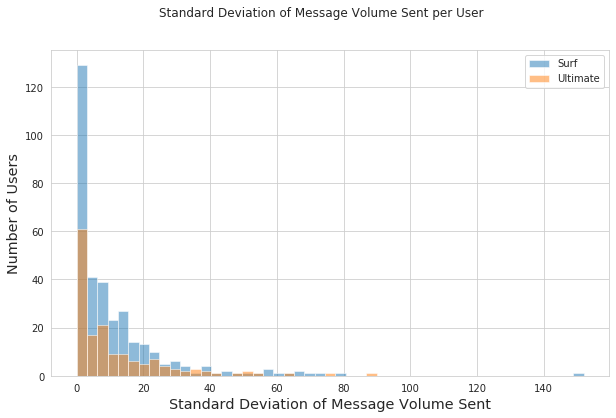

In [79]:
# Plot a histogram and... 
sns.set_style("whitegrid")
plt.figure(figsize=(10,6));
bins = np.linspace(0, 152)
plt.hist(std_message_volume_surf, bins, alpha=0.5, label='Surf')
plt.hist(std_message_volume_ultimate, bins, alpha=0.5, label='Ultimate')
plt.legend(loc='upper right')
plt.suptitle("Standard Deviation of Message Volume Sent per User")
plt.ylabel('Number of Users', size='x-large')
plt.xlabel('Standard Deviation of Message Volume Sent', size= 'x-large')
plt.show()

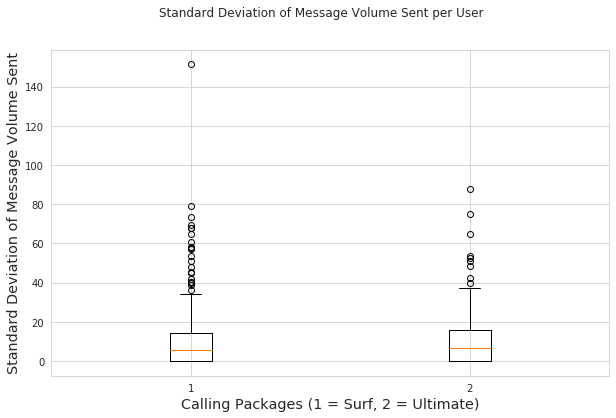

In [80]:
# ...a box-and-whisker chart.
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.suptitle("Standard Deviation of Message Volume Sent per User")
plt.ylabel('Standard Deviation of Message Volume Sent', size='x-large')
plt.xlabel('Calling Packages (1 = Surf, 2 = Ultimate)', size= 'x-large')
plt.ticklabel_format(useOffset = False, style = 'plain', axis='y')
plt.boxplot([std_message_volume_surf, std_message_volume_ultimate])
plt.show()

Plot a bar chart for the mean number of text messages sent by all the users in each calling plan during each month.

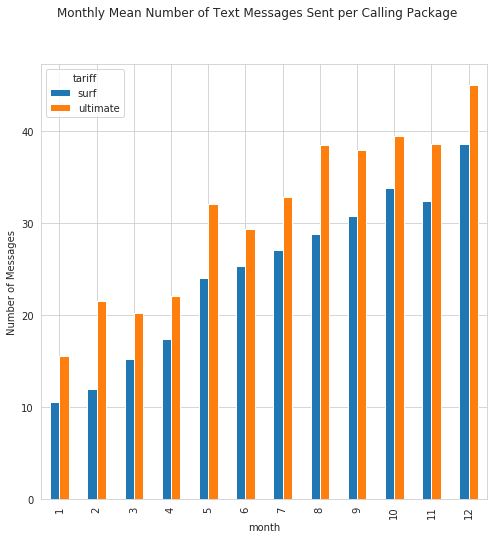

In [81]:
mean_messages = stats_messages_per_tariff['mean']
hist2_length = len(mean_messages)
ax = mean_messages.plot(kind = 'bar', figsize = (8, 8))
ylab = ax.set_ylabel('Number of Messages')
plt.xticks(np.arange(hist2_length), np.arange(1, hist2_length + 1));
plt.suptitle("Monthly Mean Number of Text Messages Sent per Calling Package");

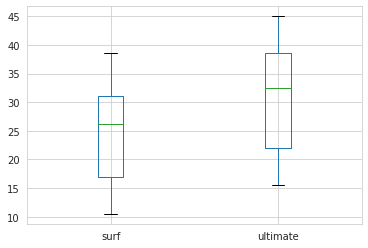

In [82]:
# ...and a boxplot.
mean_messages.plot.box();
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')

Plot a bar chart for the normalised standard deviation of the numbers of text messages sent by all the users in each calling plan during each month.

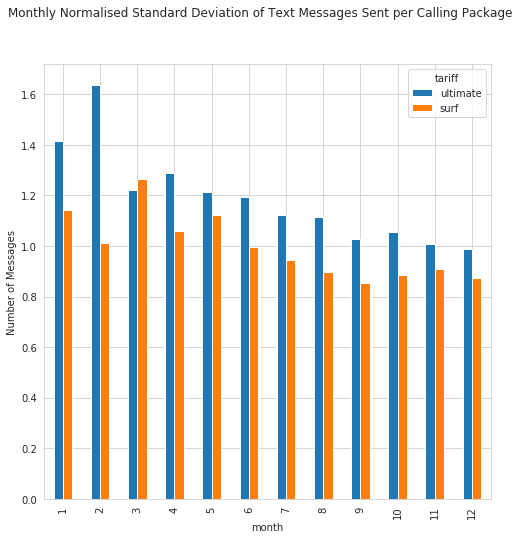

In [83]:
norm_std_messages = stats_messages_per_tariff['std_norm']
hist2_length = len(norm_std_messages)
ax = norm_std_messages.plot(kind = 'bar', figsize = (8, 8))
ylab = ax.set_ylabel('Number of Messages')
plt.xticks(np.arange(hist2_length), np.arange(1, hist2_length + 1));
plt.suptitle("Monthly Normalised Standard Deviation of Text Messages Sent per Calling Package");

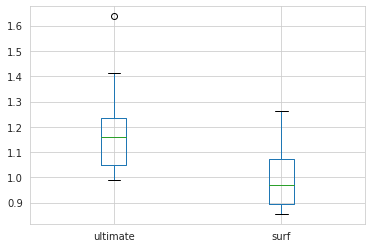

In [84]:
# ...and a boxplot.
norm_std_messages.plot.box();
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')

**Plot histograms for the data on volume of data.**

Calculate the average data volume consumed per user in each calling plan, and plot a histogram. 

In [85]:
# Create a data slice of mean data volume consumption per user, one for Surf users and one for Ultimate users. 
mean_data_volume_surf = total5.query('tariff == "surf"').groupby('user_id')['gb_used'].mean()
mean_data_volume_ultimate = total5.query('tariff == "ultimate"').groupby('user_id')['gb_used'].mean()

# Find the upper boundary common to both. 
print('Surf Max:', mean_data_volume_surf.max(), 'Ultimate Max:', mean_data_volume_ultimate.max())

Surf Max: 83.5 Ultimate Max: 69.0


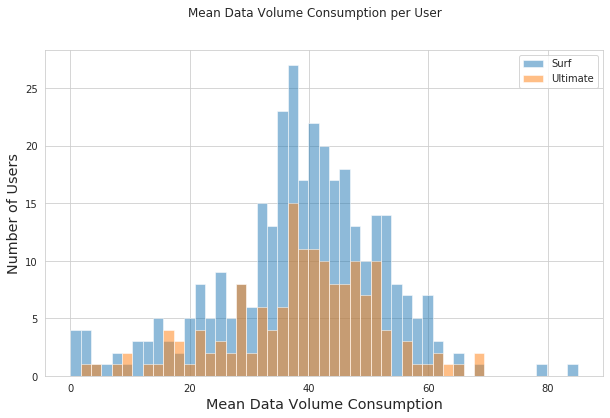

In [86]:
# Plot a histogram and... 
sns.set_style("whitegrid")
plt.figure(figsize=(10,6));
bins = np.linspace(0, 85)
plt.hist(mean_data_volume_surf, bins, alpha=0.5, label='Surf')
plt.hist(mean_data_volume_ultimate, bins, alpha=0.5, label='Ultimate')
plt.legend(loc='upper right')
plt.suptitle("Mean Data Volume Consumption per User")
plt.ylabel('Number of Users', size='x-large')
plt.xlabel('Mean Data Volume Consumption', size= 'x-large')
plt.show()

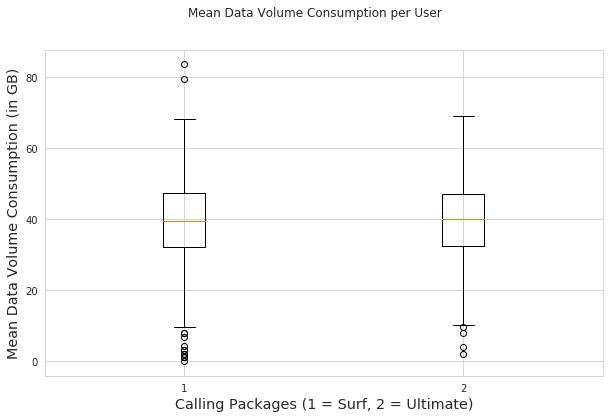

In [87]:
# ...a box-and-whisker chart.
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.suptitle("Mean Data Volume Consumption per User")
plt.ylabel('Mean Data Volume Consumption (in GB)', size='x-large')
plt.xlabel('Calling Packages (1 = Surf, 2 = Ultimate)', size= 'x-large')
plt.ticklabel_format(useOffset = False, style = 'plain', axis='y')
plt.boxplot([mean_data_volume_surf, mean_data_volume_ultimate])
plt.show()

In [88]:
# Check the min and max of the two boxplots. 
#B7 = mean_data_volume_surf.plot.box(return_type='dict')
#range7 = [item.get_ydata()[1] for item in B7['whiskers']]
#max7 = B7['whiskers'][1].get_ydata()[1]

#B8 = mean_data_volume_ultimate.plot.box(return_type='dict')
#range8 = [item.get_ydata()[1] for item in B8['whiskers']]
#max8 = B8['whiskers'][1].get_ydata()[1]

#print('B7:', range7, max7, 'B8:', range8, max8)

Calculate the standard deviation of data volume consumed per user in each calling plan, and plot a histogram.

In [89]:
# Create a data slice of the standard deviation for call durations, one for Surf users and one for Ultimate users. 
# When grouping 'gb_used' by 'used_id' and there happens to be only one row in a group, the sample standard deviation 
# returns NaN. So replacing NaN values with 0.
std_data_volume_surf = total5.query('tariff == "surf"').groupby('user_id')['gb_used'].std().fillna(0)
std_data_volume_ultimate = total5.query('tariff == "ultimate"').groupby('user_id')['gb_used'].std().fillna(0)

# Find the upper boundary common to both. 
print('Surf Max:', std_data_volume_surf.max(), 'Ultimate Max:', std_data_volume_ultimate.max())

Surf Max: 87.68124086713189 Ultimate Max: 56.568542494923804


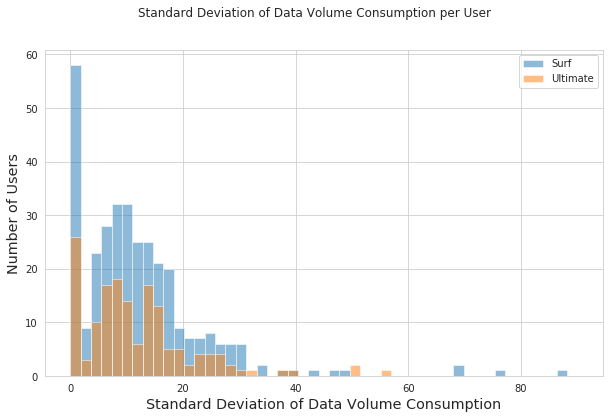

In [90]:
# Plot a histogram and... 
sns.set_style("whitegrid")
plt.figure(figsize=(10,6));
bins = np.linspace(0, 90)
plt.hist(std_data_volume_surf, bins, alpha=0.5, label='Surf')
plt.hist(std_data_volume_ultimate, bins, alpha=0.5, label='Ultimate')
plt.legend(loc='upper right')
plt.suptitle("Standard Deviation of Data Volume Consumption per User")
plt.ylabel('Number of Users', size='x-large')
plt.xlabel('Standard Deviation of Data Volume Consumption', size= 'x-large')
plt.show()

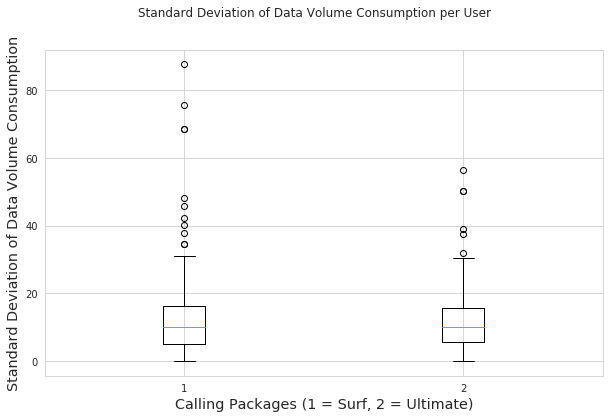

In [91]:
# ...a box-and-whisker chart.
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.suptitle("Standard Deviation of Data Volume Consumption per User")
plt.ylabel('Standard Deviation of Data Volume Consumption', size='x-large')
plt.xlabel('Calling Packages (1 = Surf, 2 = Ultimate)', size= 'x-large')
plt.ticklabel_format(useOffset = False, style = 'plain', axis='y')
plt.boxplot([std_data_volume_surf, std_data_volume_ultimate])
plt.show()

Plot a bar chart for the mean volume of data consumed by all the users in each calling plan during each month.

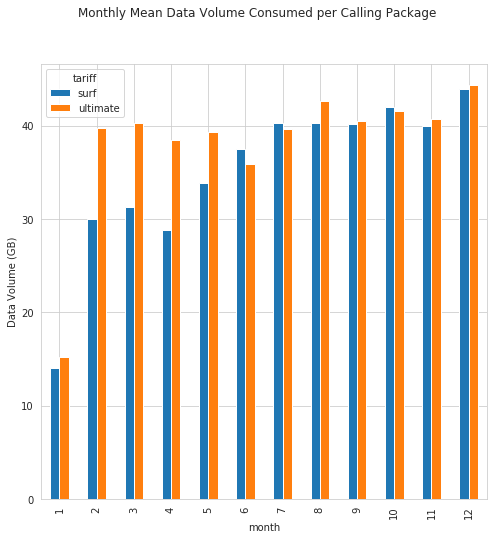

In [92]:
mean_volume = stats_GB_per_tariff['mean']
hist3_length = len(mean_volume)
ax = mean_volume.plot(kind = 'bar', figsize = (8, 8))
ylab = ax.set_ylabel('Data Volume (GB)')
plt.xticks(np.arange(hist3_length), np.arange(1, hist3_length + 1));
plt.suptitle("Monthly Mean Data Volume Consumed per Calling Package");

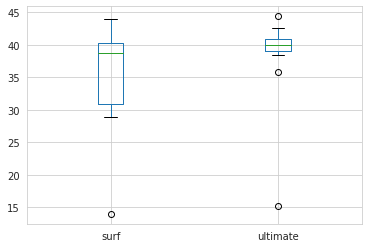

In [93]:
# ...and a boxplot.
mean_volume.plot.box();
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')

Plot a bar chart for the normalised standard deviation of the data volume consumed by all the users in each calling plan during each month.

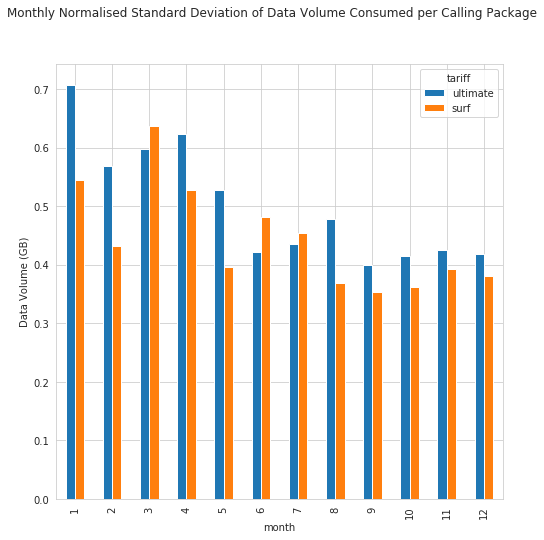

In [94]:
std_volume = stats_GB_per_tariff['std_norm']
hist3_length = len(std_volume)
ax = std_volume.plot(kind = 'bar', figsize = (8, 8))
ylab = ax.set_ylabel('Data Volume (GB)')
plt.xticks(np.arange(hist3_length), np.arange(1, hist3_length + 1));
plt.suptitle("Monthly Normalised Standard Deviation of Data Volume Consumed per Calling Package");

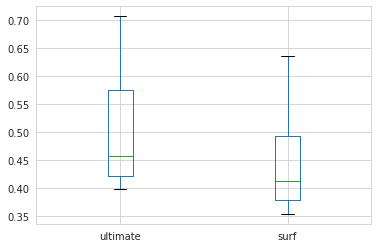

In [95]:
# ...and a boxplot.
std_volume.plot.box();
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')

**Describe the distributions.**

[call duration]
* Frequency histogram - mean call duration per user per calling package
<br>o The distribution is fairly close to normal with only a slight skewing to the right. 
<br>o Taking into account that there are twice as many Surf customers as Ultimate customers, we can see that most users talked roughly 250 to 550 minutes in 2018, with most calls being around 400 minutes long. 
<br>o There were more zero duration calls among Surf customers.
<br>o Calls above 890 minutes and 797 minutes long are being considered as outliers for Surf and Ultimate, respectively. Those are the "extreme chatterboxes" among them. 
<br>o The standard deviation confirms that there is a concensus that calls of 250 to 750 minutes in length are the most common with the least variation between the callers, and shorter calls less than 250 minutes are more varied from user to user. 

* Bar chart - mean call duration per month per calling package
<br>o There is no drastic difference between the calling packages throughout the year...
<br>...except for February where Ultimate is about 25% higher than Surf. There were no special events that stood out particularly in February 2018 in the US, so I can only speculate that the mean value was brought up single-handedly by some individual customers who made very long calls for personal reasons. The same can be said about the Surf mean being 16% higher in June, compared to Ultimate. 
<br>o The January figure is so low that it is indeed considered an outlier for both Surf and Ultimate, meaning the figure at the start of the year is atypical of the calling packages that can be seen for the rest of the year. 
<br>o The distribution is only very slightly skewed to the left. The mean call duration is fairly uniform throughout the year with little variation from month to month for both packages. 
<br>o The standard deviation tells us that call durations are very individualistic in both calling packages, that the lengths of calls vary from customer to customer.
<br>o In March, the standard deviation for Ultimate shot up, suggesting that there were some individual customers who made particularly long calls compared to an average caller.
<br> o Within each calling package, where values of standard deviation fluctuate, it may suggest that new customers join the package deals, changing the characteristic of the dispersion. The standard deviation stabilises more or less from August, indicating that no new customers with different call behaviours joined the packages. 

[Text messages]
* Frequency histogram - average number of text messages sent per user per calling package
<br>o The distribution is heavily skewed to the right. A large number of customers do not use the text messaging service at all.  
<br>o Ultimate customers send text messages more than Surf customers. A Ultimate customer sends on average 10 - 60 messages, recording a maximum of 126 messages, in comparison to a Surf customer sending 10 - 50 messages on average with a maximum of 110 messages. 
<br>o Among Surf customers, those who send 120 - 160 text messages on average are considered outliers. There are more outliers among Surf customers than Ultimate. 
<br>o The standard deviation shows that 25 - 60 are the most common number of text messages an average customer sends. There is a difference of up to 15 text messages between customers.

* Bar chart - average number of text messages sent per month per calling package
<br>o The mean is consistently higher for Ultimate than for Surf, indicating that Ultimate customers send more text messages than Surf. 
<br>o The distribution is skewed to the left, indicating a progressive growth towards the end of the year. 
<br>o The standard deviation is consistently higher for Surf, indicating a wide range of differences in the number of text messages sent between the Surf customers. 

[Data volume]
* Frequency histogram - average data volume consumed in GB per user per calling package
<br>o The distribution is fairly normal with a slight skewness to the left. 
<br>o In both packages, the majority of the customers consume 10 - 70 GB of data volume on average with the majority consuming around 40 GB. 
<br>o The boxplots of the two packages are strikingly similar with near identical min, max and range. 
<br>o The standard deviation confirms the above findings, plus the fact that any figures above 30 GB are see a lot of variation between customeres. 

* Bar chart - average data volume consumed in GB per per month per calling package
<br>o The data volume consumption was very high in Ultimate in the first half of the year, either due to some customers consuming a lot more than an average surder, or new avid-surfing customers with very high data volume consumption joined the package deal, bringing up the average of the group. 
<br>o In the latter half of the year, the data volume consumption more or less stabilised at one of the highest mean values.
<br>o Ultimate customers mostly consume more data volume than Surf customers in average. Surf customers are much more varied in their consumption behaviour. 
<br>o Since the total volume of data consumption is much higher in Surf, this is an indication that there are much fewer Ultimate customers than Surf customers, raising per-head data consumption. 
<br>o The January figure is considered an outlier and is not reflective of the general pattern of data volume consumption for both Surf and Ultimate. 
<br>o The standard deviation is much higher in Surf in the first two months of the year, suggesting the data volume consumption patterns among the customers were very varied, some consuming more and others less. 
<br>o In the second half of the year, the standard deviation was fairly even, indicating that no new high-surfers joined the packages. 

**Describe the customers' behavior.**

= With regard to call duration =
<br>o Surf deal: prepaid to 500 monthly minutes
<br>o Ultimate deal: prepaid to 3000 monthly minutes
* Neither Surf nor Ultimate customers are leveraging the prepaid deal to the full. They are using:
<br>o Surf customers: 40% - 80%.
<br>o Ultimate customers 0.4% - 14%
of the free package limit. 
* What is striking about the data is that Ultimate customers' mean is no where near 3 times that of Surf's (Ultimate customers are eligibile for 3000 min of monthly total call duration as opposed to 500 min for Surf customers, but they are half in number). Ultimate customers prepay 3.5 times more than Surf customers, and yet, talk for a similar length of time. 
<br>o Both Ultimate and Surf customers are idividualistic regarding call duration: there are those who talk a lot, and those who talk less, compared to an average caller. 

= With regard to number of text messages sent =
<br>o Surf deal: prepaid up to 50 text message
<br>o Ultimate deal: prepaid to 1000 text message
* Neither Surf nor Ultimate customers are leveraging the prepaid deal to the full. They are using:
<br>o Surf customers: 20% - 76%.
<br>o Ultimate customers 1.5% - 4.5%
of the free package limit. 
* Ultimate customers are consistently much heavier texters than Surf customers. Ultimate customers are eligible for 200 times more text messages (1000 in contrast to 50) than Surf customers. That message deal in the calling package description seems encourage Ultimate package purchasers to communicate by text. 
* Ultimate and Surf customers are both very individualistic in their texting behaviour - the standard deviation is consistently 1.0 or above. 

= With regard to volume of data consumed =
<br>o Surf deal: prepaid up to 15GB
<br>o Ultimate deal: prepaid up to 30 GB
* Neither Surf nor Ultimate customers are leveraging the prepaid deal to the full. They are using:
<br>o Surf customers: 33% - exceed the limit by 20%.
<br>o Ultimate customers 23% - 61%
of the free package limit. 
* In the first half of the year, the volume of data consumption by Ultimate customers is consistently much higher than that of Surf customers. In the latter half of the year, the pattern calms down and the consumption settles more or less at the same level as that of Surf customers. 
* Both Surf and Ultimate customers exhibit the least diverse range of the three (call duration, number of text messages, data volume consumption) in data volume consumption. 

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
Great data analysis, conclusions and assumptions. Very nice visualisation of the data.
    
If you have time and willing to practice, you can display two charts (histogram and a boxplot) using a two-column subplot.

        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
        ....
        ...
</div>

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Currently, you created only bar charts in your analysis. However, it is also required to create histograms for each type of service per plan.

Can you please add these graphs and describe distribution, possible outliers, etc.
</div>

<div class="alert alert-info"> <b>Student comments:</b> I had in fact attempted the .subplots() method, and I could not get the result I wanted. I was so aware of the time constraint that I went for the option that did work for me this time. I will practise for future. :) I have added a frequency histogram and a boxplot for the mean and standard deviation per user for each service type per calling plan, and described the distrbution and some prominent features that are apparent in the graphs. It is a lot but I would appreciate it if you could review. Thank you!</div> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>

Great that you also managed to combine 2 plans on one histogram! I left a code below with an example of how sublot can be used here. Hopefully that can be helpful on the next projects.
</div>

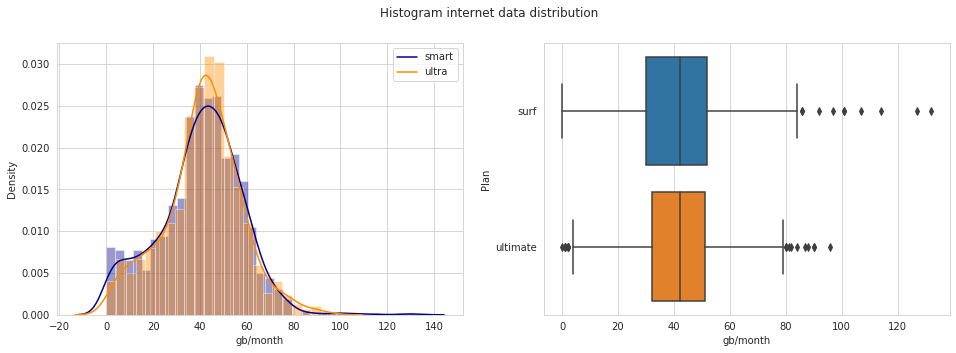

In [115]:
# Reviewer's code 

# Create one row with 2 columns with the 16 x 5 size
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Create 2 histograms for each plan. With ax=axes you can control in which column this graph will be located
sns.distplot(total5.query('tariff == "surf"')['gb_used'], color='darkblue', ax=axes[0])
sns.distplot(total5.query('tariff == "ultimate"')['gb_used'], color='darkorange', ax=axes[0])

# Create one boxplot for 2 plans in the second column. To change boxplot from horizontal to vertical you need to exchange values in x/y
sns.boxplot(data=total5.sort_values(by='tariff'), x='gb_used', y='tariff', ax=axes[1])

# Add lables for each graph
axes[0].legend(loc='upper right', labels=['smart','ultra'])
axes[0].set_xlabel('gb/month')
axes[0].set_ylabel('Density')
axes[1].set_xlabel('gb/month')
axes[1].set_ylabel('Plan')

# Add overall title
fig.suptitle('Histogram internet data distribution');

## Addendum: Additional analyses

In [96]:
# Check the ratio of Ultimate package subscribers to Surf package subscribers.
print('Surf : Ultimate:', data_users1.query('tariff == "surf"').shape[0], ':', data_users1.query('tariff == "ultimate"').shape[0])

Surf : Ultimate: 339 : 161


[Observation] Surf subscribers are a little over double Ultimate subscribers. 

In [97]:
# Compare the monthly revenue total between the two package plans.
package_vs_monthly_revenue = total5.pivot_table(index = 'month', columns = 'tariff', values = 'monthly_revenue_total', aggfunc = 'sum')
package_vs_monthly_revenue

tariff,surf,ultimate
month,,
1,100.00,280.0
2,1689.57,1148.0
3,4756.65,2268.0
4,9095.53,3388.0
5,17387.37,4543.0
6,24869.80,6839.0
7,34513.56,9632.0
8,46246.85,12397.0
9,54374.67,13573.0


In [98]:
# Check the monthly growth rate.
surf_growth_rate = package_vs_monthly_revenue['surf'].div(package_vs_monthly_revenue['surf'].shift(1)).fillna(0)
ultimate_growth_rate = package_vs_monthly_revenue['ultimate'].div(package_vs_monthly_revenue['ultimate'].shift(1)).fillna(0)
monthly_growth_rate = pd.merge(surf_growth_rate, ultimate_growth_rate, on = 'month')

# Print the pivot table. 
monthly_growth_rate

,surf,ultimate
month,,
1,0.000000,0.000000
2,16.895700,4.100000
3,2.815302,1.975610
4,1.912171,1.493827
5,1.911639,1.340909
6,1.430337,1.505393
7,1.387770,1.408393
8,1.339962,1.287064
9,1.175749,1.094862


[Observation] Both packages started off slow at the beginning of the year, but picked up a pace by the second month. Surf grew at a rate of 1.1 - 7.7 % every month in comparison to the Ultimate's rate of 1.2 - 1.8%. Surf overtook Ultimate in revenue growth very quickly. By the end of the year, Surf's revenue had grown double that of Ultimate's. Megaline earned a considerable amount of surchage from Surf customers. 

In [99]:
# Check which prepaid package has a higher rate of cancellation. 
ex_ultimate = data_users1[(data_users1.churn_date.notnull()) & (data_users1.tariff == 'ultimate')].shape[0]
ex_surf = data_users1[(data_users1.churn_date.notnull()) & (data_users1.tariff == 'surf')].shape[0]

print('ex_ultimate to ex-surf ratio:', ex_ultimate, ':', ex_surf)

ex_ultimate to ex-surf ratio: 11 : 23


[Observation] There are only 34 rows in the users data that contain a non-NaN value in 'churn_date'. Thus the sample size is small, but Surf calling plan has twice as high cancellation rate than Ultimate calling plan. 

In [100]:
# Calculate the monthly surcharge totals per calling package. 
monthly_surcharge = total5.pivot_table(index = 'month', columns = 'tariff', values = ['duration_surcharge', 'message_surcharge', 'gb_surcharge'], aggfunc = 'sum')
monthly_surcharge

duration_surcharge          gb_surcharge          message_surcharge  \
tariff               surf ultimate         surf ultimate              surf   
month                                                                        
1                    0.00      0.0         60.0      0.0              0.00   
2                    9.33      0.0       1500.0    658.0              0.24   
3                   16.26      0.0       4280.0   1428.0              0.39   
4                   52.92      0.0       8040.0   1918.0              2.61   
5                  127.71      0.0      15710.0   2513.0              9.66   
6                  155.31      0.0      22760.0   3549.0             14.49   
7                  265.98      0.0      31810.0   5502.0             17.58   
8                  267.66      0.0      42710.0   7427.0             29.19   
9                  278.58      0.0      50180.0   7553.0             36.09   
10                 425.25      0.0      65580.0   9989.0             59.58   
11                 495.57      0.0      72960.0  11942.0             59.64   
12                 805.68      0.0      93490.0  17094.0            101.46   

                 
tariff ultimate  
month            
1           0.0  
2           0.0  
3           0.0  
4           0.0  
5           0.0  
6           0.0  
7           0.0  
8           0.0  
9           0.0  
10          0.0  
11          0.0  
12          0.0

[Observation] Surf and Ultimate package deals brought in 63442.13 USD and 1666 USD, respectively, in surchages during 2018.

## Test the hypotheses

* The average revenue from users of Ultimate and Surf calling plans differs.
* The average revenue from users in NY-NJ area is different from that of the
users from other regions.

You decide what alpha value to use.
<br>Explain:
* How you formulated the null and alternative hypotheses.
* What criterion you used to test the hypotheses and why.

### Test the hypothesis: The average revenue from users of Ultimate and Surf calling plans differs.

Perform some preliminary checks in order to know which statistical test to choose for checking the hypothesis.

In [101]:
# Prepare arrays only with the monthly revenue total, one from Ultimate calling plan users and another from Surf.
ultimate_revenue_total = total5.loc[total5['tariff'] == 'ultimate', 'monthly_revenue_total']
surf_revenue_total = total5.loc[total5['tariff'] == 'surf', 'monthly_revenue_total']

# View the datasets.
#ultimate_revenue_total
#surf_revenue_total

# Check the sample sizes.
ultimate_sample_size = len(ultimate_revenue_total)
surf_sample_size = len(surf_revenue_total)
print('ultimate sample size:', ultimate_sample_size)
print('surf sample size:', surf_sample_size)
print()

# Calculate the means of the monthly revenue totals.
ultimate_average_revenue = round(ultimate_revenue_total.mean(), 2)
surf_average_revenue = round(surf_revenue_total.mean(), 2)
print('ultimate average revenue:', ultimate_average_revenue)
print('surf average revenue:', surf_average_revenue)
print()

# Calculate the variances.
ultimate_variance = ultimate_revenue_total.var()
surf_variance = surf_revenue_total.var()
print('ultimate variance:', ultimate_variance)
print('surf variance:', surf_variance)
print()

# Calculate the standard deviation.
ultimate_std = ultimate_revenue_total.std()
surf_std = surf_revenue_total.std()
print('ultimate std:', ultimate_std)
print('surf std:', surf_std)

ultimate sample size: 720
surf sample size: 1573

ultimate average revenue: 166.63
surf average revenue: 282.12

ultimate variance: 7624.603598748261
surf variance: 26647.073082603216

ultimate std: 87.3189761663996
surf std: 163.23931230743167


**Formulate the null and alternative hypotheses and explain how.**

We have two samples of monthly revenue totals: one from Ultimate users, and another from Surf users. The two samples are independent of each other. We want to compare the means of these two samples. 

A null hypothesis takes the form of "the means of two populations are equal to each other". So, in our case, the null hypothesis will be:

* H0 = "The average revenue from Ultimate calling plan users is equal to that of Surf."

In case the null hypothesis is rejected, i.e. there is sufficient evidence against it, we need to set up the hypothesis for the not-equal-to alternative. So, in our case, the alternative hypothesis will be:

* H1 = "The average revenue from Ultimate calling plan users differs from that of Surf."


**Explain the criterion you used to test the hypotheses and why.**

Use Welch's t-test
<br>Reason: Welch's t-test allows us to compare two data sets and not just the two mean values. The means of the Ultimate and Surf samples are different. Whether or not the difference between these numbers is significant depends on the variance of the samples, and the variances of the two samples are unequal (confirmed by the two values of standard deviation which are very far apart).

Welch's test is an adaptation of Student's t-test, and is more reliable when the two samples have unequal variances and/or unequal sample sizes like they are in our case. 


When performing the statistical test, set the following criteria: 
* Set equal_var = False.
<br>Reason: the variances of the two samples are different.
* Set the statistical significance level of 5%, i.e. alpha = 0.05
<br>Reason: since this is not a test that needs strict accuracy, I am using the most commonly used value. 

If the p-value is less than alpha, we reject the hypothesis. 

In [102]:
# Take the standard accepted value for the critical statistical significance.
alpha = 0.05

results = st.ttest_ind(ultimate_revenue_total, surf_revenue_total, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value: 2.3248333100718407e-97
We reject the null hypothesis


[Observation] The p-value tells us that there is a 2.32 * 10^-95% probability of getting a difference that size or larger, assuming that H0 is correct. Since the p-value is very small, it indicates that such an extreme observed outcome would be very unlikely under the null hypothesis, meaning "The average revenue from Ultimate calling plan users differs from that of Surf". 

### Test the hypothesis: The average revenue from users in NY-NJ area is different from that of the users from other regions.

Perform some preliminary checks in order to know which statistical test to choose for checking the hypothesis.

In [103]:
# Prepare arrays only with the monthly revenue total, one from the NY-NJ resident users and 
# another from those living in the rest of the areas.
NY_NJ_revenue_total = total5.loc[total5.city.str.contains('NY-NJ'), 'monthly_revenue_total']
other_revenue_total = total5.loc[~total5.city.str.contains('NY-NJ'), 'monthly_revenue_total']

# View the datasets.
#NY_NJ_revenue_total
#other_revenue_total

# Check the sample sizes.
NY_NJ_sample_size = len(NY_NJ_revenue_total)
other_sample_size = len(other_revenue_total)
print('NY-NJ sample size:', NY_NJ_sample_size)
print('other sample size:', other_sample_size)
print()

# Calculate the means of the monthly revenue totals.
NY_NJ_average_revenue = round(NY_NJ_revenue_total.mean(), 2)
other_average_revenue = round(other_revenue_total.mean(), 2)
print('NY-NJ average revenue:', NY_NJ_average_revenue)
print('other average revenue:', other_average_revenue)
print()

# Calculate the variances.
NY_NJ_variance = NY_NJ_revenue_total.var()
other_variance = other_revenue_total.var()
print('NY-NJ variance:', NY_NJ_variance)
print('other variance:', other_variance)
print()

# Calculate the standard deviation.
NY_NJ_std = NY_NJ_revenue_total.std()
other_std = other_revenue_total.std()
print('NY-NJ std:', NY_NJ_std)
print('other std:', other_std)

NY-NJ sample size: 377
other sample size: 1916

NY-NJ average revenue: 265.58
other average revenue: 241.97

NY-NJ variance: 21278.910913691518
other variance: 23907.38687259039

NY-NJ std: 145.87292728156078
other std: 154.62013734501204


[Observation] The standard deviation figures of the two samples are rather close. 

Check with Levene's test.

A null hypothesis takes the form of "the means of two populations are equal to each other". So, in our case, the null hypothesis will be:

* H0 = "The standard deviation of the average revenue from users in NY-NJ area is the same as that of the average revenue from the users from other regions."

In case the null hypothesis is rejected, i.e. there is sufficient evidence against it, we need to set up the hypothesis for the not-equal-to alternative. So, in our case, the alternative hypothesis will be:

* H1 = "The standard deviation of the average revenue from users in NY-NJ area is different from that of the average revenue from the users in other regions."

Note: in Levene's tests, a small p-value suggests that the populations do NOT have equal variances, i.e.
* if pvalue < 0.05, it implies unequal variances, therefore, go for H1
* if pvalue >= 0.05, it implies equal variances, therefore, go for H0

Check the data distribution to decide the median-based test or the mean-based test. 

In [1]:
# Plot boxplots for the data slices. 
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.suptitle("Monthly Revenue Total from Each User")
plt.ylabel('Monthly Revenue Total', size='x-large')
plt.xlabel('Calling Packages (1 = Surf, 2 = Ultimate)', size= 'x-large')
plt.ticklabel_format(useOffset = False, style = 'plain', axis='y')
plt.boxplot([NY_NJ_revenue_total, other_revenue_total])
plt.show()

NameError: name 'sns' is not defined

[Observation] The graphs are skewed to the right. So go for the median-based test. 

In [105]:
# Take the standard accepted value for the critical statistical significance in both cases.
alpha = 0.05

# Levene's test centered at the median
results2 = st.levene(NY_NJ_revenue_total, other_revenue_total, center='median')
print('p-value_median:', results2.pvalue)

if results2.pvalue < alpha:
    print('We reject the null hypothesis centered at the median')
else:
    print("We can't reject the null hypothesis centered at the median") 

p-value_median: 0.2774915597507235
We can't reject the null hypothesis centered at the median


[Observation] The pvalue is greater than 0.05, which means the variances of the two samples are equal, i.e. we go for H0.

<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
That is amazing that you managed to check and compare variances using Levene's test. 

Two remarks: 
   
- The small p-value actually suggests that the populations do not have equal variances.
    
- We can decide which type of test to use (median or mean) based on the distribution of the data. You can additionally test data distribution type (e.g. Shapiro Wilk test). You can check various tests that can be used here - https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93
    
    
    From documentation: 
        Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
        ‘median’ : Recommended for skewed (non-normal) distributions>
        ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
        ‘trimmed’ : Recommended for heavy-tailed distributions.
</div>

<div class="alert alert-info"> <b>Student comments:</b> Thank you for pointing out. The pvalue is greater than 0.05, i.e. it is big, so the variances are equal, so I went with equal_var=True in the Welch's t-test below. I added the distribution test to determine whether to go for the median-base or the mean-base Levene's test. </div> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>

Yes, that is true, pvalue was indeed not so small in the Levene's test.
</div>

**Formulate the null and alternative hypotheses and explain how.**

We have two samples of monthly revenue totals: one from users living in the NY-NJ area, and another from users living in the rest of the areas. The two samples are independent of each other. We want to compare the means of these two samples. 

A null hypothesis takes the form of "the means of two populations are equal to each other". So, in our case, the null hypothesis will be:

* H0 = "The average revenue from users in NY-NJ area is the same as that of the users from other regions."

In case the null hypothesis is rejected, i.e. there is sufficient evidence against it, we need to set up the hypothesis for the not-equal-to alternative. So, in our case, the alternative hypothesis will be:

* H1 = "The average revenue from users in NY-NJ area is different from that of the users in other regions."


**Explain the criterion you used to test the hypotheses and why.**

Use Welch's t-test
<br>Reason: Welch's t-test allows us to compare two data sets and not just the two mean values. The means of the NY-NJ resident users and the users living in the rest of the areas are different, but not significantly enough. Levene's test tells us that the variances of the two samples are equal. The sizes of the two samples are very different.  

When performing the statistical test, set the following criteria: 
* Set equal_var = True
<br>Reason: the variances of the two samples are deemed equal.
* Set the statistical significance level of 5%, i.e. alpha = 0.05
<br>Reason: since this is not a test that needs strict accuracy, I am using the most commonly used value. 

If the p-value is less than alpha, we reject the hypothesis. 

In [106]:
# Take the standard accepted value for the critical statistical significance.
alpha = 0.05

results4 = st.ttest_ind(NY_NJ_revenue_total, other_revenue_total, equal_var=True)

print('p-value:', results4.pvalue)

if results4.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value: 0.006303007908069691
We reject the null hypothesis


[Observation] The p-value tells us that there is a 0.63% probability of getting a difference that size or larger, assuming that H0 is correct. Since the p-value is smaller than the 5% threshold, it indicates that such an extreme observed outcome would be unlikely under the null hypothesis, meaning "The average revenue from users in NY-NJ area is different from that of the users in other regions.". 

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- Overall you did a great job!  Hypotheses hav been formulated and tested correctly. Great that you additionally checked data that has been used for the test.
- Nice that you've used Levene test to check variances.

## Overall conclusion

[Executive summary]
<br>So, of Surf and Ultimate, which prepaid plan brings in more revenue? Overall, Surf seems to be Megaline's flagship calling package. 

As an example of the "Sell cheap, earn more" sales model, Surf prepaid package was more profitable than Ultimate in terms of total monthly revenue over the period of a year in 2018, bringing in 94902.13 USD, almost twice as much as Ultimate revenue of 52066.00 USD. 

Both Ultimate and Surf started off rather slowly at the beginning of the year, but Surf quickly picked up a pace from the second month, and grew at a rate of 1.1 - 7.7 % every month in comparison to the Ultimate's rate of 1.2 - 1.8%. 

Surf and Ultimate package deals brought in 63442.13 USD and 1666 USD, respectively, in surchages during 2018, where Surf's figure is 38 times that of Ultimate.

Surf package enjoyed twice as many subscribers as Ultimate. This was proportional to the cancellation rate as well, however, though based on very limited data.


<br>Megaline may leverage the data to adjust the plans as follows:
* Revise the number of monthly prepaid minutes in Ultimate to decrease from 3000. 3000 is too big a number that no customer will excceed. There is no big difference in the consumption behaviour between Ultimate and Surf customers. Find a good threshold that strikes a balance between being able to earn from surcharges and giving the customers an impression that they are still getting a good deal by paying 3.5 times the Surf package price. 

* Revise the number of monthly prepaid text messages in Ultimate to decrease from 1000. 1000 is too big a number that no customer will excceed. Ultimate customers are heavy texters. Perhaps, this is because the good package deal encourages them. Without damaging that, find a good threshold that strikes a balance between being able to earn from surcharges and giving the customers an impression that they are still getting a good deal by paying 3.5 times the Surf package price. 

* Promote the benefit of sending text messages. The data show 80 out of 500 customers each sent between zero and 10 text messages in the entire year. We need to tap into that potential market by first examining the possible reasons why 16% of the customers are not texting, then addressing those issues. 

* Find out some possible reasons for Ultimate customers consuming more data volume during the first half of the year to see if there is a correlation between their behaviour and a seasonal element, and attribute it to the customers receiving a free package of 30 GB as opposed to 15 GB. 


<br>[Specifics - Data preprocessing]
* Missing values: no rows were deleted for missing a value. The 'churn_date' in the calls data was the only variable missing values, and it turned out to be MNAR - leaving the variable empty was a way of indicating that the customer was still actively using the calling package. In case I would have to perform calculations, I filled with empty values with today's date, a date very far in the future compared to the date values found in the column, which were all from the year 2018. 

* Data type conversion: the following variables were converted from object to datetime for ease of calculation: 
<br>o 'churn_date' (calls data)
<br>o 'call_date' (calls data)
<br>o 'session_date' (internet data)
<br>o 'message_date' (messages data)
<br>o 'reg_date' (users data)

* Potentially illogical values: the following variables were observed to contain zero and were cleared as being legitimate:
<br>o 'duration' (calls data)
<br>o 'mb_used' (internet data)

* Bug reporting: a bug report was filed on 'churn_date'. There were 'churn_date' values that were earlier than:
<br>o 'reg_date' (users data): how can a customer leave a prepaid package deal before the registration date?
<br>o 'call_date' (call data): how can a customer continue making calls after he has cancelled a prepaid package deal?
<br>Since there was no logical way for me to take care of these records, I suggested to prepare a bug report, stating the nature of the issue, its possible cause and its consequences to the business, with a copy of the users data and call data csv files containing the problematic rows highlighted. 

* Duplicates: no rows were found to be duplicated column for column. 

* Aligning with Megaline prepaid plan policy: the data volume included in the two prepaid packages was expressed in MB, so I added the values in terms of GB to reflect the Megaline pricing policy for ease of calculation. 

* No variable renaming was required, nor the unification of inconsistent variable names.

* Additional columns: as per instructed in the project description, the following variables were calculated and added to the dataset:
<br>o the number of calls made and minutes used per month
<br>o the number of text messages sent per month
<br>o the volume of data per month
<br>o the monthly revenue from each user


<br>[Specifics - Analysis]
* Calculated the monthly volume in call duration, sent messages and data consumption for each calling package. 
* Calculate the mean, variance, and standard deviation for the monthly volume of call duration, sent messages and data consumption for each calling package. 
* Plotted a histogram and a boxplot for the monthly volume in call duration, sent messages and data consumption for each calling package, and described the patterns in their distributions.
* Described the behaviour of the customers subscribing to each calling package in terms of call duration, sent messages and data consumption. 


<br>[Specifics - Testing the hypotheses]
* In the first case, the validity of the hypothesis: 
<br>The average revenue from users of Ultimate and Surf calling plans differs.
was evaluated between two average revenue samples, one from Ultimate calling package and another from Surf calling package.  
* A set of one null and one alternative hypotheses were formulated. 
* In a preliminary investigation, the sizes, mean revenues, variances and standard deviations of the two samples were estimated. 
* From the results of the prelimary investigation, Welch's t-test was selected as the appropriate testing method for testing the hypothesis. 
<br>o Since the variances of the two samples were not equal, the equal_var argument was set to False.
<br>o The standard accepted value of 0.05 was set for the critical statistical significance (alpha) for both cases.
* The test concluded with an extremely high certainty that "The average revenue from Ultimate calling plan users differs from that of Surf".
<br>
<br>

* In the second case, the validity of the hypothesis: 
<br>The average revenue from users in NY-NJ area is different from that of the users from other regions.
was evaluated between two average revenue samples, one from NY-NJ residents and another from calling package subscribers in the rest of the regions in the US.  
* A set of one null and one alternative hypotheses were formulated. 
* In a preliminary investigation, the sizes, mean revenues, variances and standard deviations of the two samples were estimated. 
* From the results of the prelimary investigation, Welch's t-test was selected as the appropriate testing method for testing the hypothesis. 
<br>o Since the variances of the two samples were deemed equal by Levene's test, the equal_var argument was set to True.
<br>o The standard accepted value of 0.05 was set for the critical statistical significance (alpha) for both cases.
* The test concluded with certainty that "The average revenue from users in NY-NJ area is different from that of the users in other regions.".

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- Overall you conducted once again an outstanding research with correct interim findings, clean code and nice visualisation.
- I like your overall conclusion. It is very structured and provides insights to the business. 

<div class="alert alert-info"> <b>Student comments:</b> After adding and studying the frequency histogram and boxplot for the average message volume sent per user, I added a possible business suggestion ("Promote the benefit of sending text messages."). Also, after re-examining the result of Levene's test, I adjusted the conclusion from "a borerline case" to "a certain case".</div> 

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v2:</b>

Looks like text messages are no longer needed by the customers :) But that is a point of attention whether to promote or reduce the number of free messages.
    
PS: As a last thing, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo 🙌
<div>